<a href="https://colab.research.google.com/github/GadirajuSanjayvarma/GarbageDetection/blob/master/SIH_objectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import torch
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Garbage annotated dataset-20200728T111037Z-001.zip','r') as zip_ref:
  zip_ref.extractall('/content')

In [ ]:
cd /content

/content


## data preprocessing is completed now we will start some code

In [ ]:
face_images=[]
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(1,536)):
      face_images+=["/content/Garbage annotated dataset/dataset/Images/image_{}.jpg".format(str(i))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
f=open("/content/Garbage annotated dataset/dataset/Labels/image_1.txt",'r')
a=f.readline()
print(a.split(" ",10))

['1', '0.46166666666666667', '0.4925', '0.18333333333333335', '0.14\n']


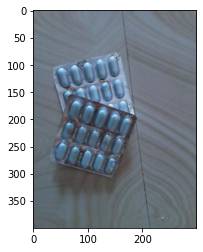

(300, 400)


In [ ]:
img1=Image.open(face_images[510])
plt.imshow(img1)
plt.show()
#1 0.16 0.25 0.5 0.5
print(img1.size)

In [ ]:
labels=[]
for i in tqdm_notebook(range(1,536)):
  f=open("/content/Garbage annotated dataset/dataset/Labels/image_{}.txt".format(str(i)),'r')
  contents=f.readline()
  #print(contents)
  #print(contents)
  array1=contents.split(" ",10)
  array1[-1]=array1[-1][:-1]
  #print(i,array1)
  labels.append((list(map(lambda a: (float)(a), array1))))
  #print(labels)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
print(labels[509])

[1.0, 0.16, 0.25, 0.5, 0.0]


In [ ]:
print(len(face_images))
print(len(labels))

535
535


In [ ]:
with zipfile.ZipFile('/content/drive/My Drive/Copy of final_dataset.zip','r') as zip_ref:
  zip_ref.extractall('/content')

In [ ]:
for i in tqdm_notebook(range(1,3758)):
      face_images+=["/content/final_dataset/images/image_{}.jpg".format(str(i))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [ ]:
for i in tqdm_notebook(range(1,3758)):
  f=open("/content/final_dataset/labels/image_{}.txt".format(str(i)),'r')
  contents=f.readline()
  array1=contents.split(" ",10)
  array1[-1]=array1[-1][:-1]
  
  labels.append((list(map(lambda a: (float)(a), array1))))
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [ ]:
print(labels[0])

[1.0, 0.46166666666666667, 0.4925, 0.18333333333333335, 0.14]


In [ ]:
print(labels[0])

[1.0, 0.46166666666666667, 0.4925, 0.18333333333333335, 0.14]


In [ ]:
print(len(face_images))
print(len(labels))

4292
4292


In [ ]:
dataset=list(zip(face_images,labels))

In [ ]:
print(dataset[0])

('/content/Garbage annotated dataset/dataset/Images/image_1.jpg', [1.0, 0.46166666666666667, 0.4925, 0.18333333333333335, 0.14])


In [ ]:
import random

In [ ]:
random.shuffle(dataset)
print(len(dataset))

4292


In [ ]:
print(dataset[0])

('/content/final_dataset/images/image_2187.jpg', [1.0, 0.8854625550660794, 0.6601941747572815, 0.22907488986784144, 0.16019417475728154])


In [ ]:
train_dataset=[x for i,x in enumerate(dataset) if(i<(0.90*len(dataset)))]
test_dataset=[dataset[x] for x in range((int)(0.90*len(dataset)),len(dataset)) ]

In [ ]:
print(len(train_dataset))

3863


In [ ]:
dataset.clear()

In [ ]:
print(len(test_dataset))

430


In [ ]:
print(test_dataset[0])

('/content/final_dataset/images/image_2198.jpg', [1.0, 0.7466960352422908, 0.8325242718446602, 0.24229074889867844, 0.1699029126213592])


In [ ]:
print(train_dataset[0])

('/content/final_dataset/images/image_2643.jpg', [1.0, 0.5242290748898679, 0.3677184466019417, 0.40528634361233484, 0.20145631067961164])


In [ ]:
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
import cupy as cp 
'''numpy executes on cpu even though you are on gpu.So i am using cupy which will execute on gpu and 10 times faster than numpy only on larger operations'''
import glob
n = 0
s = cp.zeros(3)
sq = cp.zeros(3)
for i in tqdm_notebook(face_images):
  data=Image.open(i)
  x = cp.array(data)/255
  s += x.sum(axis=(0,1))
  sq += cp.sum(cp.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = cp.sqrt((sq/n - cp.square(mu)))
print(mu, sq/n, std, n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.



[0.52981315 0.54760613 0.59899948] [0.30392472 0.32557751 0.39572439] [0.15239009 0.16032791 0.19215623] 407878268


In [ ]:
from torchvision import transforms

mu=[0.52981315,0.54760613,0.59899948]
std=[0.15239009,0.16032791,0.19215623]

train_transforms=transforms.Compose([
                                     
  transforms.ColorJitter(brightness=(0.8,1), contrast=(0.8,1), saturation=0, hue=0),
  transforms.ToTensor(),
  transforms.Normalize(mu, std)

])

test_transforms=transforms.Compose(
    [
      
     transforms.ToTensor(),
     transforms.Normalize(mu,std)

    ]
)


In [ ]:
images,labels=zip(*train_dataset)
print(labels[0])

[1.0, 0.5242290748898679, 0.3677184466019417, 0.40528634361233484, 0.20145631067961164]


In [ ]:
from torch.utils.data import Dataset
from skimage import io
import numpy as np
from PIL import Image
class get_dataset(Dataset):
  def __init__(self,dataset,transforms=None):
    self.image,self.labels=zip(*dataset)
    self.transform=transforms
 
  def __len__(self):
    return (len(self.image))
    
  def __getitem__(self,index):
      if(torch.is_tensor(index)):
        index=index.tolist(index)
      #print(self.image[index])  
      #print(index)

      input1=Image.open(self.image[index])
      input1=input1.resize((224,224))
      #print(input1.size)
      if(self.transform):
        input1=self.transform(input1)
      id,x,y,w,h=self.labels[index]
      #print("inside get_dataset",self.labels[index])  
      return self.image[index],input1,id,x-(w/2.0),y-(h/2.0),x+(w/2.0),y+(h/2.0)

In [ ]:
class DataLoader:
  """
  Helper class to load test and train data
  """
  def __init__(self, shuffle=True, batch_size=128, seed=1):
    cuda = torch.cuda.is_available()
    
    if cuda:
      torch.cuda.manual_seed(seed)

    # dataloader arguments - something you'll fetch these from cmdprmt
    self.dataloader_args = dict(shuffle=shuffle, batch_size=batch_size, num_workers=4, pin_memory=True) if cuda else dict(shuffle=shuffle, batch_size=batch_size)

  def load(self, data):
    return torch.utils.data.DataLoader(data, **self.dataloader_args)

In [ ]:
train=get_dataset(train_dataset,train_transforms)
test=get_dataset(test_dataset,test_transforms)
dataloader=DataLoader(batch_size=32)
train_loader=dataloader.load(train)
test_loader=dataloader.load(test)

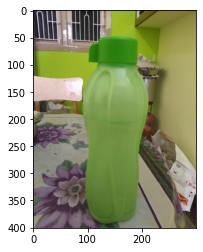

(300, 401)


In [ ]:
img1=Image.open('/content/Garbage annotated dataset/dataset/Images/image_496.jpg')
plt.imshow(img1)
plt.show()
print(img1.size)

In [ ]:
dataiter=iter(train_loader)
name,input1,x,y,w,h=dataiter.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/content/final_dataset/images/image_745.jpg


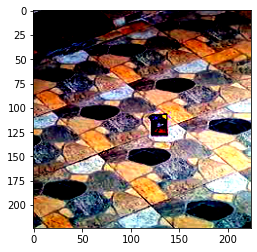

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
it is a garbage
tensor(0.4890, dtype=torch.float64)
tensor(0.4490, dtype=torch.float64)
tensor(0.6608, dtype=torch.float64)
tensor(0.6141, dtype=torch.float64)


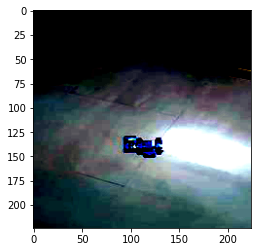

it is a garbage
tensor(0.3789, dtype=torch.float64)
tensor(0.5340, dtype=torch.float64)
tensor(0.6476, dtype=torch.float64)
tensor(0.6966, dtype=torch.float64)


In [ ]:
dataiter=iter(train_loader)
name,input1,id,x,y,w,h=dataiter.next()
print(name[0])
plt.imshow(input1[0].numpy().transpose(1,2,0))
plt.show()
print(input1[0].shape)
if(id[0]==1):
  print("it is a garbage")
else:
  print("it is not a garbage")
print(x[0])
print(y[0])
print(w[0])
print(h[0])
#print(name[1])
plt.imshow(input1[1].numpy().transpose(1,2,0))
plt.show()
if(id[1]==1):
  print("it is a garbage")
else:
  print("it is not a garbage")

print(x[1])
print(y[1])
print(w[1])
print(h[1])

In [ ]:
print(labels[334])

[0.0, 0.5, 0.1011904761904762, 0.38, 0.14523809523809525]


(224, 224)


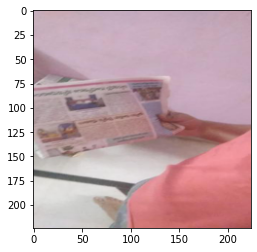

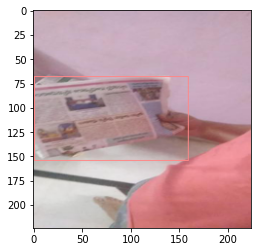

In [ ]:
# def foo(a):
#   f=open('/content/Garbage annotated dataset/dataset/Labels/image_100.txt')
#   contents=f.readline()
#   array1=contents.split(" ",10)
#   array1[-1]=array1[-1][:-1]
#   id,x,y,h,w=list(map(lambda a: (float)(a), array1))

def foo(n):
  f=open(f'/content/Garbage annotated dataset/dataset/Labels/image_{n}.txt')
  l = f.readline()
  tag, cx, cy, wx, wy = map(float, l.split())
  f.close()
  return cx-wx/2, cy-wy/2, cx+wx/2, cy+wy/2

def display(n):
  im = Image.open(f'/content/Garbage annotated dataset/dataset/Images/image_{n}.jpg').resize((224,224))
  print(im.size)
  plt.imshow(im)
  plt.show()
  draw = ImageDraw.Draw(im)
  x0, y0, x1, y1 = foo(n)
  draw.rectangle(((x0*224,y0*224),(x1*224,y1*224)), outline="#ff8888")
  plt.imshow(im)
  plt.show()
  
from PIL import Image, ImageDraw, ImageFont
import cv2
# get an image
image_name=100
display(338)



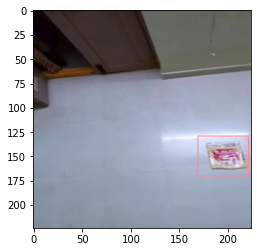

In [ ]:
from PIL import Image, ImageDraw, ImageFont
dataiter=iter(train_loader)
name,input1,id,x,y,x1,y1=dataiter.next()
im = Image.open(name[0]).resize((224,224))
draw = ImageDraw.Draw(im)
draw.rectangle(((x[0]*224,y[0]*224),(x1[0]*224,y1[0]*224)), outline="#ff8888")
plt.imshow(im)
plt.show()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from torchsummary import summary
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self,in_planes, planes, stride=1 ):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out
    

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 32
        self.trainer = None
        self.name = "Models"

        self.conv1 = nn.Conv2d(3,32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.layer1 = self._make_layer(block, 32, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 32, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 32, num_blocks[3], stride=2)
        self.gap=nn.AdaptiveAvgPool2d((1,1))
        self.linear = nn.Linear(32*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.gap(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out
        
    def summary(self, input_size):
      summary(self, input_size=input_size)

  


def ResNet18(num_class=10):
    return ResNet(BasicBlock, [2,2,2,2],num_classes=num_class)


In [ ]:
Model=ResNet18(5)
Model.cuda().float()
Model.summary((3, 100,100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 100, 100]             864
       BatchNorm2d-2         [-1, 32, 100, 100]              64
            Conv2d-3         [-1, 32, 100, 100]           9,216
       BatchNorm2d-4         [-1, 32, 100, 100]              64
            Conv2d-5         [-1, 32, 100, 100]           9,216
       BatchNorm2d-6         [-1, 32, 100, 100]              64
        BasicBlock-7         [-1, 32, 100, 100]               0
            Conv2d-8         [-1, 32, 100, 100]           9,216
       BatchNorm2d-9         [-1, 32, 100, 100]              64
           Conv2d-10         [-1, 32, 100, 100]           9,216
      BatchNorm2d-11         [-1, 32, 100, 100]              64
       BasicBlock-12         [-1, 32, 100, 100]               0
           Conv2d-13           [-1, 32, 50, 50]           9,216
      BatchNorm2d-14           [-1, 32,

In [ ]:
m = nn.Sigmoid()
input = torch.randn((1,1,4))
output = m(input)
print(output)

tensor([[[0.1517, 0.7841, 0.5660, 0.7685]]])


## New architecture

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.LeakyReLU()
        ) 
        self.pool1 = nn.MaxPool2d(2, 2)
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU()

        )
        self.pool2 = nn.MaxPool2d(2, 2)
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU()
            
        )
        self.pool3 = nn.MaxPool2d(2, 2)
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU()
            
        )
        self.pool4 = nn.MaxPool2d(2, 2)
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU()
            
        )
        self.pool5 = nn.MaxPool2d(2, 2)
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.LeakyReLU()
            
        )
        self.gap=nn.AdaptiveAvgPool2d((1,1))
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1, 1), bias=False),
            nn.BatchNorm2d(32),
            nn.LeakyReLU()
            
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=4, kernel_size=(1, 1), bias=False)
            
            
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=1, kernel_size=(1, 1), bias=False)
            
            
        )
        self.last_function=nn.Sigmoid()

    def summary(self, input_size):
      summary(self, input_size=input_size)   
    def forward(self, x):
       x=self.convblock1(x)
       x=self.pool1(x)
       x=self.convblock2(x)
       x=self.pool2(x)
       x=self.convblock3(x)
       x=self.pool3(x)
       x=self.convblock4(x)
       x=self.pool4(x)
       x=self.convblock5(x)
       x=self.pool5(x)
       x=self.convblock6(x)
       x=self.gap(x)
       x1=x
       x1=self.layer3(x1)
       x=self.layer1(x)
       x=self.layer2(x)
       #x=self.last_function(x)
       x = x.view(x.size(0), -1)
       x1=x1.view(x1.size(0),-1)
       return x,x1



In [ ]:
Model=Net()
Model.cuda().float()
Model.summary((3, 224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             864
       BatchNorm2d-2         [-1, 32, 224, 224]              64
         LeakyReLU-3         [-1, 32, 224, 224]               0
         MaxPool2d-4         [-1, 32, 112, 112]               0
            Conv2d-5         [-1, 64, 112, 112]          18,432
       BatchNorm2d-6         [-1, 64, 112, 112]             128
         LeakyReLU-7         [-1, 64, 112, 112]               0
         MaxPool2d-8           [-1, 64, 56, 56]               0
            Conv2d-9          [-1, 128, 56, 56]          73,728
      BatchNorm2d-10          [-1, 128, 56, 56]             256
        LeakyReLU-11          [-1, 128, 56, 56]               0
        MaxPool2d-12          [-1, 128, 28, 28]               0
           Conv2d-13          [-1, 128, 28, 28]         147,456
      BatchNorm2d-14          [-1, 128,

In [ ]:
optimizer = torch.optim.Adam(Model.parameters())
criterion=nn.MSELoss()
criterion1=torch.nn.BCEWithLogitsLoss()

In [ ]:
!ps -aux|grep python

root          19  0.3  0.9 431984 124124 ?       Sl   08:35   0:21 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --LargeFileManager.delete_to_trash=False --MappingKernelManager.root_dir="/content"
root         124  2.9 28.8 26619392 3846364 ?    Ssl  08:35   3:15 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-e82271e9-38ea-4397-81fd-b8b0fc07e62b.json
root        4013  0.0  0.0  39196  6552 ?        S    10:27   0:00 /bin/bash -c ps -aux|grep python
root        4015  0.0  0.0   5708   492 ?        D    10:27   0:00 grep python


In [ ]:
! kill -9 124 4013 4015

In [ ]:
from PIL import Image, ImageDraw, ImageFont


def display1(name,x0,y0,x1,y1):
  im = Image.open(name).resize((224,224))

  draw = ImageDraw.Draw(im)
  
  draw.rectangle(((x0*224,y0*224),(x1*224,y1*224)), outline="#ff8888")
  plt.imshow(im)
  plt.show()

def iou(box1,box2):
  xi1=torch.max(box1[0],box2[0])
  
  yi1=torch.max(box1[1],box2[1])
  
  xi2=torch.min(box1[2],box2[2])
  
  yi2=torch.min(box1[3],box2[3])
  #print(xi1,yi1,xi2,yi2)
  a=torch.sub(yi2,yi1)
  
  b=torch.sub(xi2,xi1)
  
  inter_area=torch.mul(a,b)
  
  box1_area=torch.mul(torch.sub(box1[3],box1[1]),torch.sub(box1[2],box1[0]))
  
  box2_area=torch.mul(torch.sub(box2[3],box2[1]),torch.sub(box2[2],box2[0]))
  
  union_area=torch.sub(torch.add(box1_area , box2_area),inter_area)
  
  iou=torch.div(inter_area,union_area.float())
  
  return torch.mean(iou)




In [ ]:
box1 = (2, 1, 4, 3)
box2 = (1, 2, 3, 4) 
print(torch.mul(torch.tensor([3]),-1))
print("iou = " + str(iou(torch.tensor(box1),torch.tensor(box2))))

tensor([-3])
iou = tensor(0.1429)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def loss_function(box1,box2):
  xi1=torch.max(box1[0],box2[0])
  
  yi1=torch.max(box1[1],box2[1])
  
  xi2=torch.min(box1[2],box2[2])
  
  yi2=torch.min(box1[3],box2[3])
  #print(xi1,yi1,xi2,yi2)
  a=torch.sub(yi2,yi1)
  
  b=torch.sub(xi2,xi1)
  
  inter_area=torch.mul(a,b)
  
  box1_area=torch.mul(torch.sub(box1[3],box1[1]),torch.sub(box1[2],box1[0]))
  
  box2_area=torch.mul(torch.sub(box2[3],box2[1]),torch.sub(box2[2],box2[0]))
  
  union_area=torch.sub(torch.add(box1_area , box2_area),inter_area)
  
  loss=(union_area-inter_area)/(box2_area+1e-8)
  
  return torch.mean(loss)


In [ ]:
a=torch.tensor([5])
b=torch.log(a)
print(b)

0



test_loss tensor(0.0187, device='cuda:0', dtype=torch.float64) iou_score 15.94 %
it is a garbage


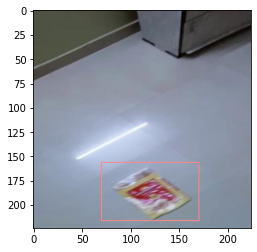

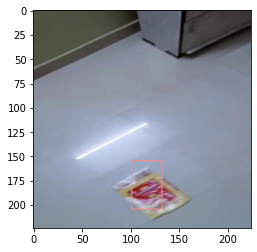

1



test_loss tensor(0.0101, device='cuda:0', dtype=torch.float64) iou_score 27.39 %
it is a garbage


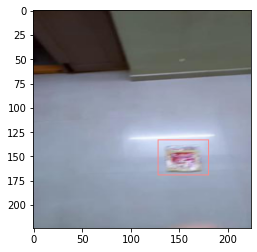

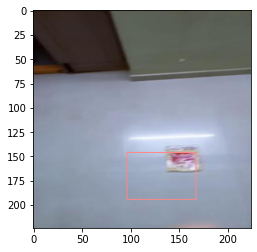

2



test_loss tensor(0.0097, device='cuda:0', dtype=torch.float64) iou_score 20.69 %
it is a garbage


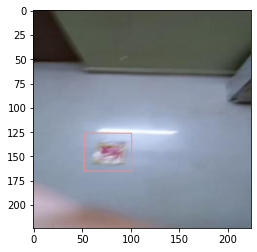

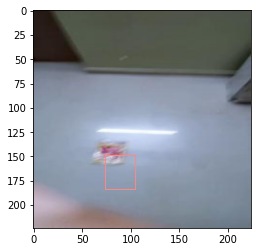

3



test_loss tensor(0.0084, device='cuda:0', dtype=torch.float64) iou_score 34.15 %
it is a garbage


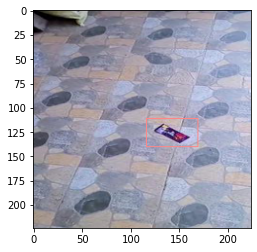

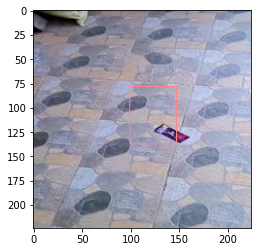

4



test_loss tensor(0.0081, device='cuda:0', dtype=torch.float64) iou_score 52.43 %
it is a garbage


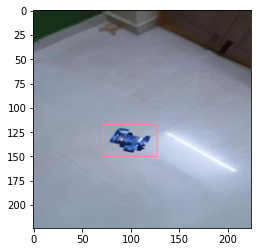

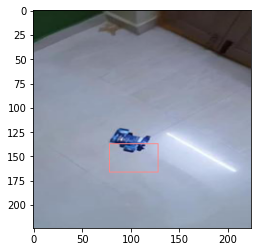

5



test_loss tensor(0.0083, device='cuda:0', dtype=torch.float64) iou_score 21.13 %
it is a garbage


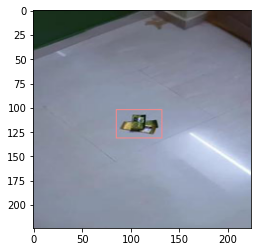

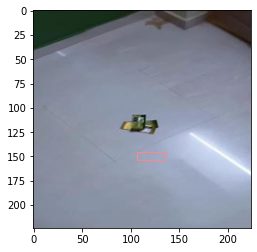

6



test_loss tensor(0.0094, device='cuda:0', dtype=torch.float64) iou_score 26.49 %
it is a garbage


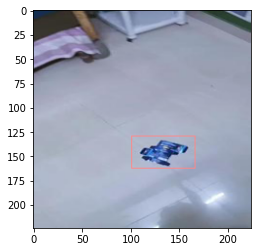

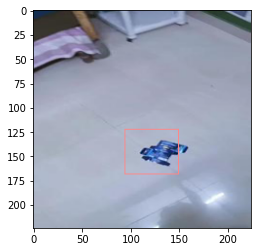

7



test_loss tensor(0.0071, device='cuda:0', dtype=torch.float64) iou_score 47.7 %
it is a garbage


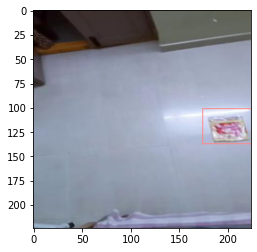

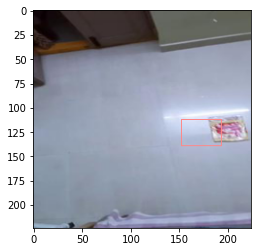

8



test_loss tensor(0.0059, device='cuda:0', dtype=torch.float64) iou_score 46.8 %
it is a garbage


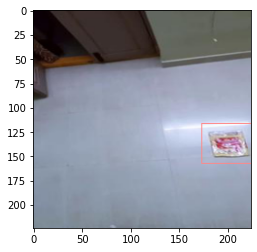

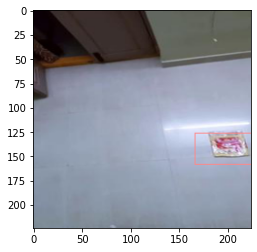

9



test_loss tensor(0.0071, device='cuda:0', dtype=torch.float64) iou_score 38.95 %
not a garbage


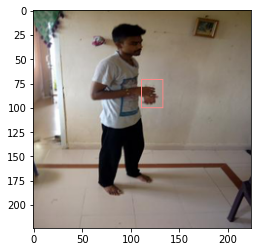

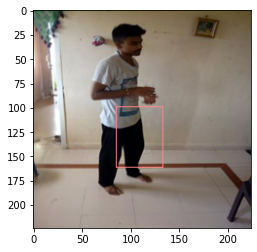

10



test_loss tensor(0.0068, device='cuda:0', dtype=torch.float64) iou_score 51.4 %
not a garbage


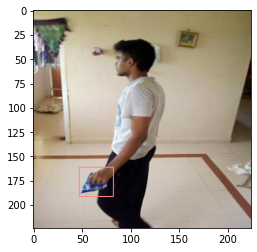

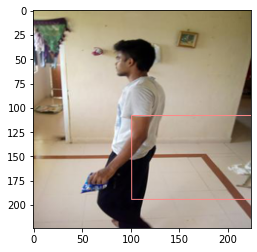

11



test_loss tensor(0.0088, device='cuda:0', dtype=torch.float64) iou_score 47.29 %
it is a garbage


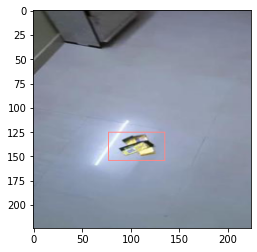

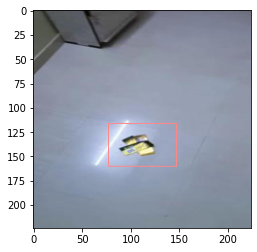

12



test_loss tensor(0.0063, device='cuda:0', dtype=torch.float64) iou_score 52.23 %
it is a garbage


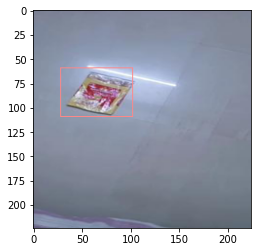

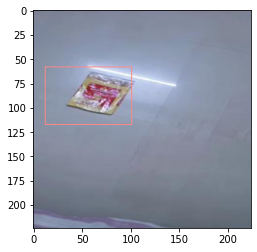

13



test_loss tensor(0.0057, device='cuda:0', dtype=torch.float64) iou_score 54.21 %
it is a garbage


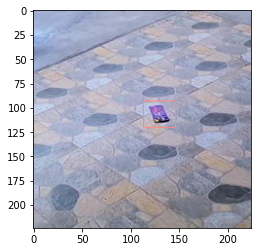

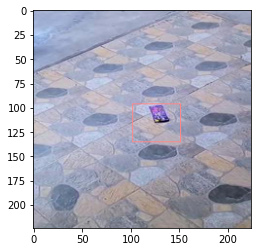

14



test_loss tensor(0.0070, device='cuda:0', dtype=torch.float64) iou_score 38.04 %
it is a garbage


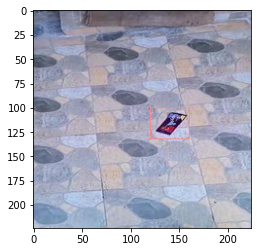

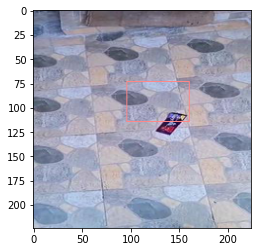

15



test_loss tensor(0.0058, device='cuda:0', dtype=torch.float64) iou_score 33.13 %
it is a garbage


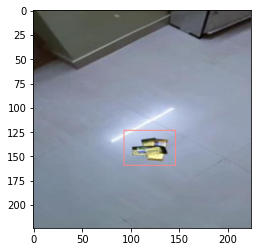

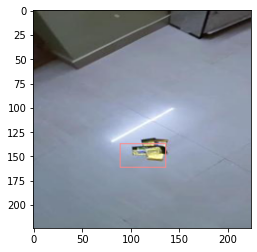

16



test_loss tensor(0.0058, device='cuda:0', dtype=torch.float64) iou_score 49.39 %
it is a garbage


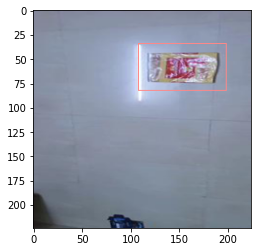

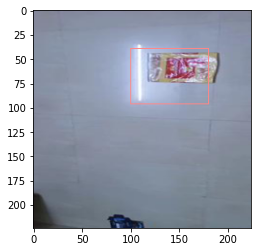

17



test_loss tensor(0.0082, device='cuda:0', dtype=torch.float64) iou_score 51.48 %
it is a garbage


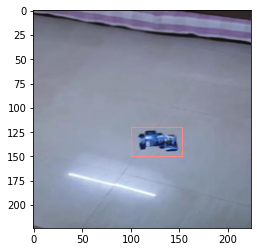

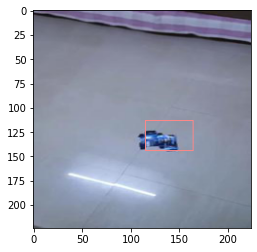

18



test_loss tensor(0.0053, device='cuda:0', dtype=torch.float64) iou_score 54.83 %
it is a garbage


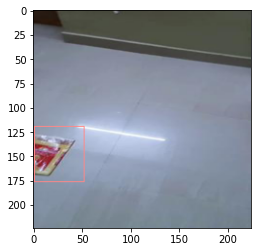

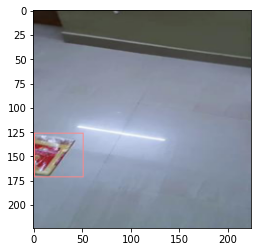

19



test_loss tensor(0.0078, device='cuda:0', dtype=torch.float64) iou_score 36.32 %
it is a garbage


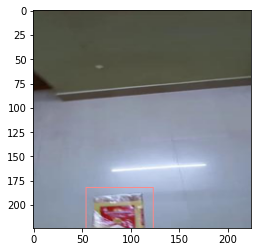

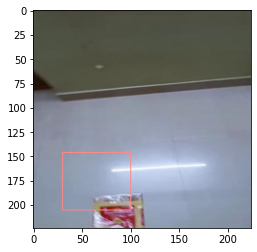

20



test_loss tensor(0.0066, device='cuda:0', dtype=torch.float64) iou_score 36.74 %
not a garbage


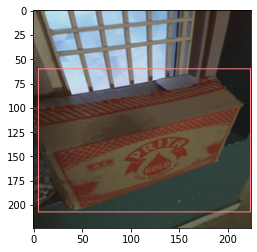

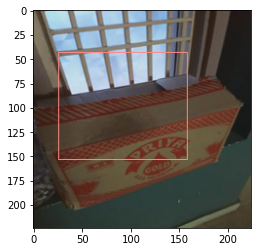

21



test_loss tensor(0.0053, device='cuda:0', dtype=torch.float64) iou_score 53.6 %
it is a garbage


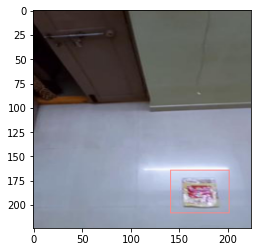

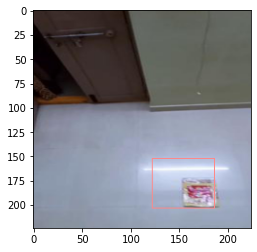

22



test_loss tensor(0.0067, device='cuda:0', dtype=torch.float64) iou_score 52.86 %
it is a garbage


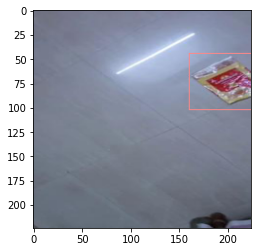

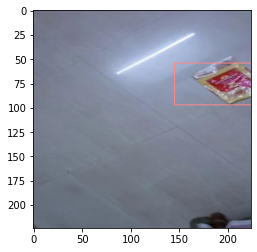

23



test_loss tensor(0.0057, device='cuda:0', dtype=torch.float64) iou_score 51.87 %
it is a garbage


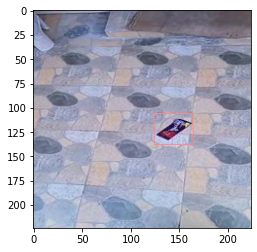

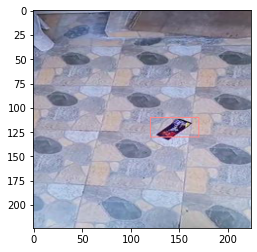

24



test_loss tensor(0.0064, device='cuda:0', dtype=torch.float64) iou_score 47.74 %
it is a garbage


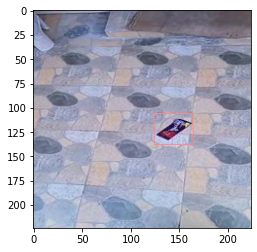

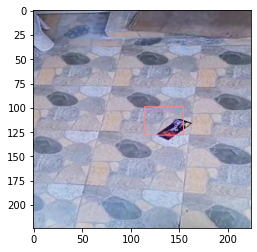

25



test_loss tensor(0.0057, device='cuda:0', dtype=torch.float64) iou_score 50.94 %
it is a garbage


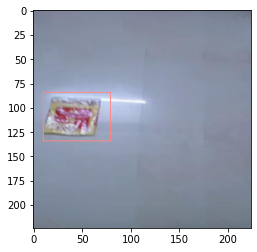

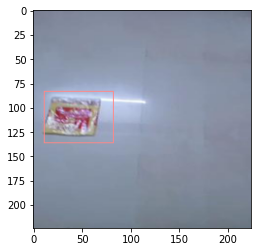

26



test_loss tensor(0.0055, device='cuda:0', dtype=torch.float64) iou_score 43.32 %
it is a garbage


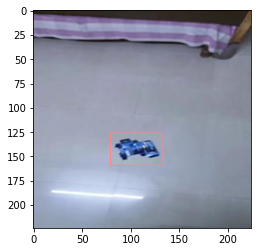

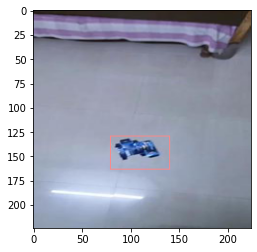

27



test_loss tensor(0.0117, device='cuda:0', dtype=torch.float64) iou_score 44.02 %
it is a garbage


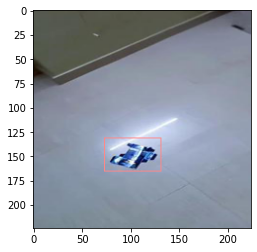

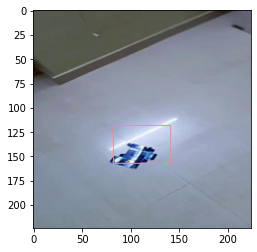

28



test_loss tensor(0.0080, device='cuda:0', dtype=torch.float64) iou_score 43.14 %
it is a garbage


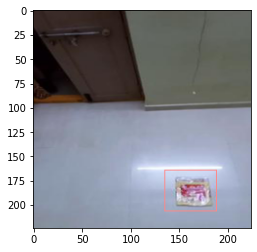

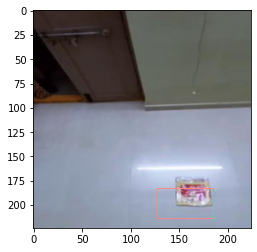

29



test_loss tensor(0.0066, device='cuda:0', dtype=torch.float64) iou_score 48.03 %
it is a garbage


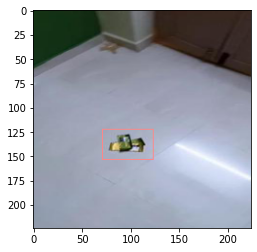

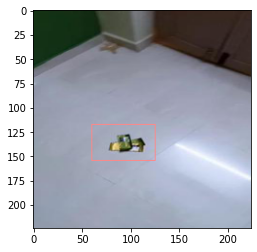

30



test_loss tensor(0.0063, device='cuda:0', dtype=torch.float64) iou_score 53.56 %
it is a garbage


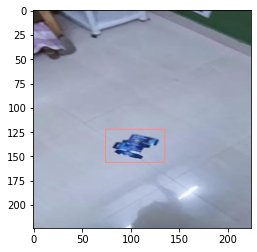

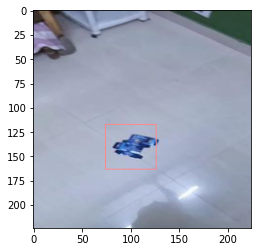

31



test_loss tensor(0.0078, device='cuda:0', dtype=torch.float64) iou_score 59.94 %
it is a garbage


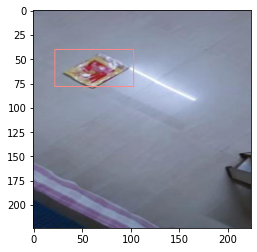

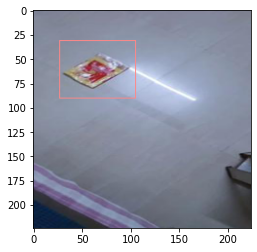

32



test_loss tensor(0.0087, device='cuda:0', dtype=torch.float64) iou_score 49.97 %
it is a garbage


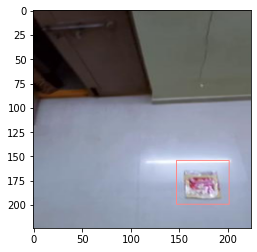

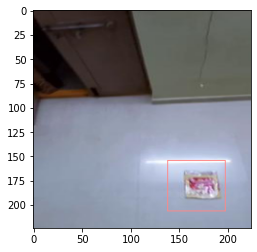

33



test_loss tensor(0.0104, device='cuda:0', dtype=torch.float64) iou_score 29.51 %
it is a garbage


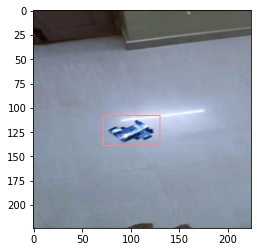

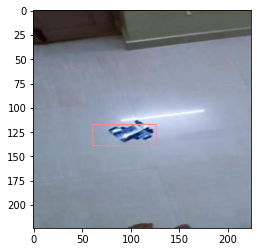

34



test_loss tensor(0.0067, device='cuda:0', dtype=torch.float64) iou_score 37.18 %
it is a garbage


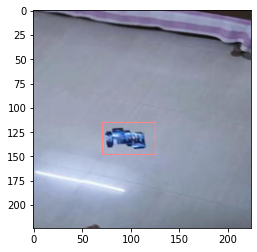

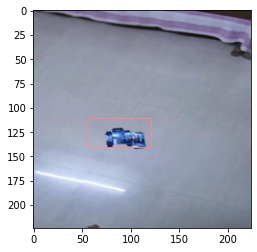

35



test_loss tensor(0.0063, device='cuda:0', dtype=torch.float64) iou_score 56.83 %
not a garbage


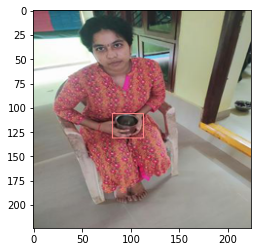

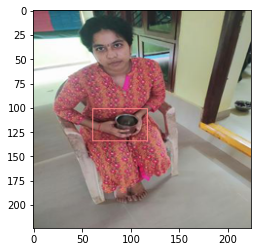

36



test_loss tensor(0.0078, device='cuda:0', dtype=torch.float64) iou_score 31.64 %
not a garbage


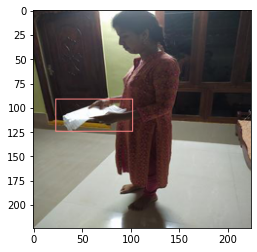

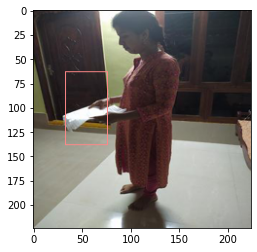

37



test_loss tensor(0.0067, device='cuda:0', dtype=torch.float64) iou_score 54.95 %
it is a garbage


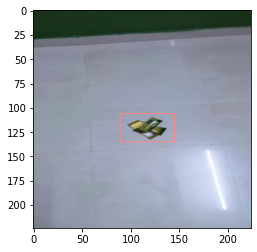

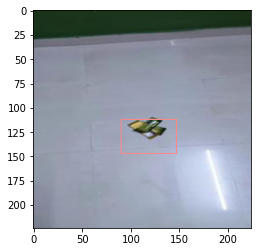

38



test_loss tensor(0.0077, device='cuda:0', dtype=torch.float64) iou_score 53.89 %
it is a garbage


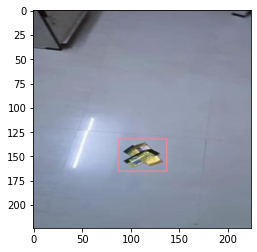

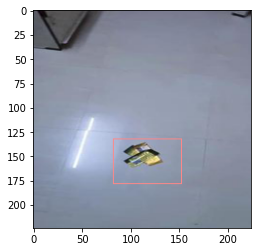

39



test_loss tensor(0.0083, device='cuda:0', dtype=torch.float64) iou_score 52.24 %
it is a garbage


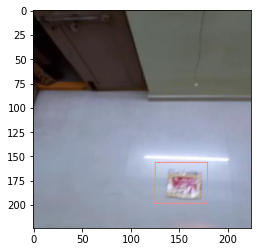

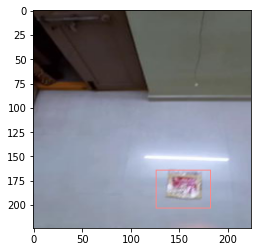

In [ ]:
EPOCHS=40
k=1
iouscore_previous=0.0

for epoch in range(EPOCHS):
    print(epoch)
    torch.backends.cudnn.benchmark = True
    torch.cuda.empty_cache()
    pbar = tqdm_notebook(train_loader)
    for i,[name,image,id,x,y,x1,y1] in enumerate(pbar):
      # get 
      image,id,x,y,x1,y1 = image.to('cuda'),id.to('cuda'),x.to('cuda'),y.to('cuda'),x1.to('cuda'),y1.to('cuda') 

      # Init
      optimizer.zero_grad()
      # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
      # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.
 
      # Predict
      predictions,id_pred=Model(image)
      predictions=predictions.double()
      id_pred=id_pred.double().squeeze(1)
      loss1=criterion1(id_pred+1e-8,id+1e-8)  
      loss2=criterion(predictions[:,0]+1e-8,x+1e-8)+criterion(predictions[:,1]+1e-8,y+1e-8)+criterion(predictions[:,2]+1e-8,x1+1e-8)+criterion(predictions[:,3]+1e-8,y1+1e-8) 
      x_pred,y_pred,x1_pred,y1_pred=predictions[:,0],predictions[:,1],predictions[:,2],predictions[:,3]
      #loss=torch.mul(torch.log(iou([x_pred,y_pred,x1_pred,y1_pred],[x,y,x1,y1])+0.00001),-1)
      #loss=loss_function([x_pred,y_pred,x1_pred,y1_pred],[x,y,x1,y1])  
      loss=loss1+loss2
      if(loss>10):
          print("loss1",loss1)
          print("loss2",loss2)
          print("criterion1",criterion(predictions[:,0]+1e-8,x+1e-8))
          print("criterion1",criterion(predictions[:,1]+1e-8,y+1e-8))
          print("criterion1",criterion(predictions[:,2]+1e-8,x1+1e-8))
          print("criterion1",criterion(predictions[:,3]+1e-8,y1+1e-8))
          print(name)
          k=0
          break
      loss.backward()
      optimizer.step()
      
      iou_score=iou([x_pred,y_pred,x1_pred,y1_pred],[x,y,x1,y1])

      pbar.set_description(f'Batch={i} Loss={loss:0.4f}  IOU={iou_score*100:0.2f}%')
    if(k==0):
      break
    # testing starts now
    Model.eval()
    with torch.no_grad():
        test_loss=0
        for i,[_,image,id,x,y,x1,y1] in enumerate(test_loader):
          image,id,x,y,x1,y1 = image.to('cuda'),id.to('cuda'),x.to('cuda'),y.to('cuda'),x1.to('cuda'),y1.to('cuda') 
          predictions,id_pred=Model(image)
          predictions=predictions.double()
          id_pred=id_pred.double().squeeze(1)
          loss1=criterion1(id_pred+1e-8,id+1e-8)  
          loss2=criterion(predictions[:,0]+1e-8,x+1e-8)+criterion(predictions[:,1]+1e-8,y+1e-8)+criterion(predictions[:,2]+1e-8,x1+1e-8)+criterion(predictions[:,3]+1e-8,y1+1e-8) 
          x_pred,y_pred,x1_pred,y1_pred=predictions[:,0],predictions[:,1],predictions[:,2],predictions[:,3]
          loss=loss1+loss2
          iou_score=iou([x_pred,y_pred,x1_pred,y1_pred],[x,y,x1,y1])
          if(iou_score>iouscore_previous):
                  torch.save(Model.state_dict(), "/content/drive/My Drive/Model_garbage3.pt")
                  iouscore_previous=iou_score
          test_loss+=loss/(len(test_loader))
        print("test_loss",test_loss/(len(test_loader)),"iou_score",round((float)(iou_score)*100,2),"%")  

        # get an image
        name,im,id,x_ac,y_ac,w_ac,h_ac = next(iter(test_loader))
        image=Image.open(name[0])
        draw = ImageDraw.Draw(image)
        im= im.to('cuda') 
        predictions,id_pred=Model(im)
        predictions=predictions.double()
        id_pred=id_pred.double().squeeze(1)
        x,y,x1,y1=predictions[0]
        id_prediction=id_pred[0]
        #a=(int)(x_ac[0])
        if(id_prediction<0.5):
          print("not a garbage")
        else:
          print("it is a garbage")
        display1(name[0],x_ac[0],y_ac[0],w_ac[0],h_ac[0])
        display1(name[0],x,y,x1,y1)


In [ ]:
Model1=Net()
Model1=Model1.cuda()
Model1.load_state_dict(torch.load('/content/drive/My Drive/Model_garbage3.pt'))
Model1.eval()

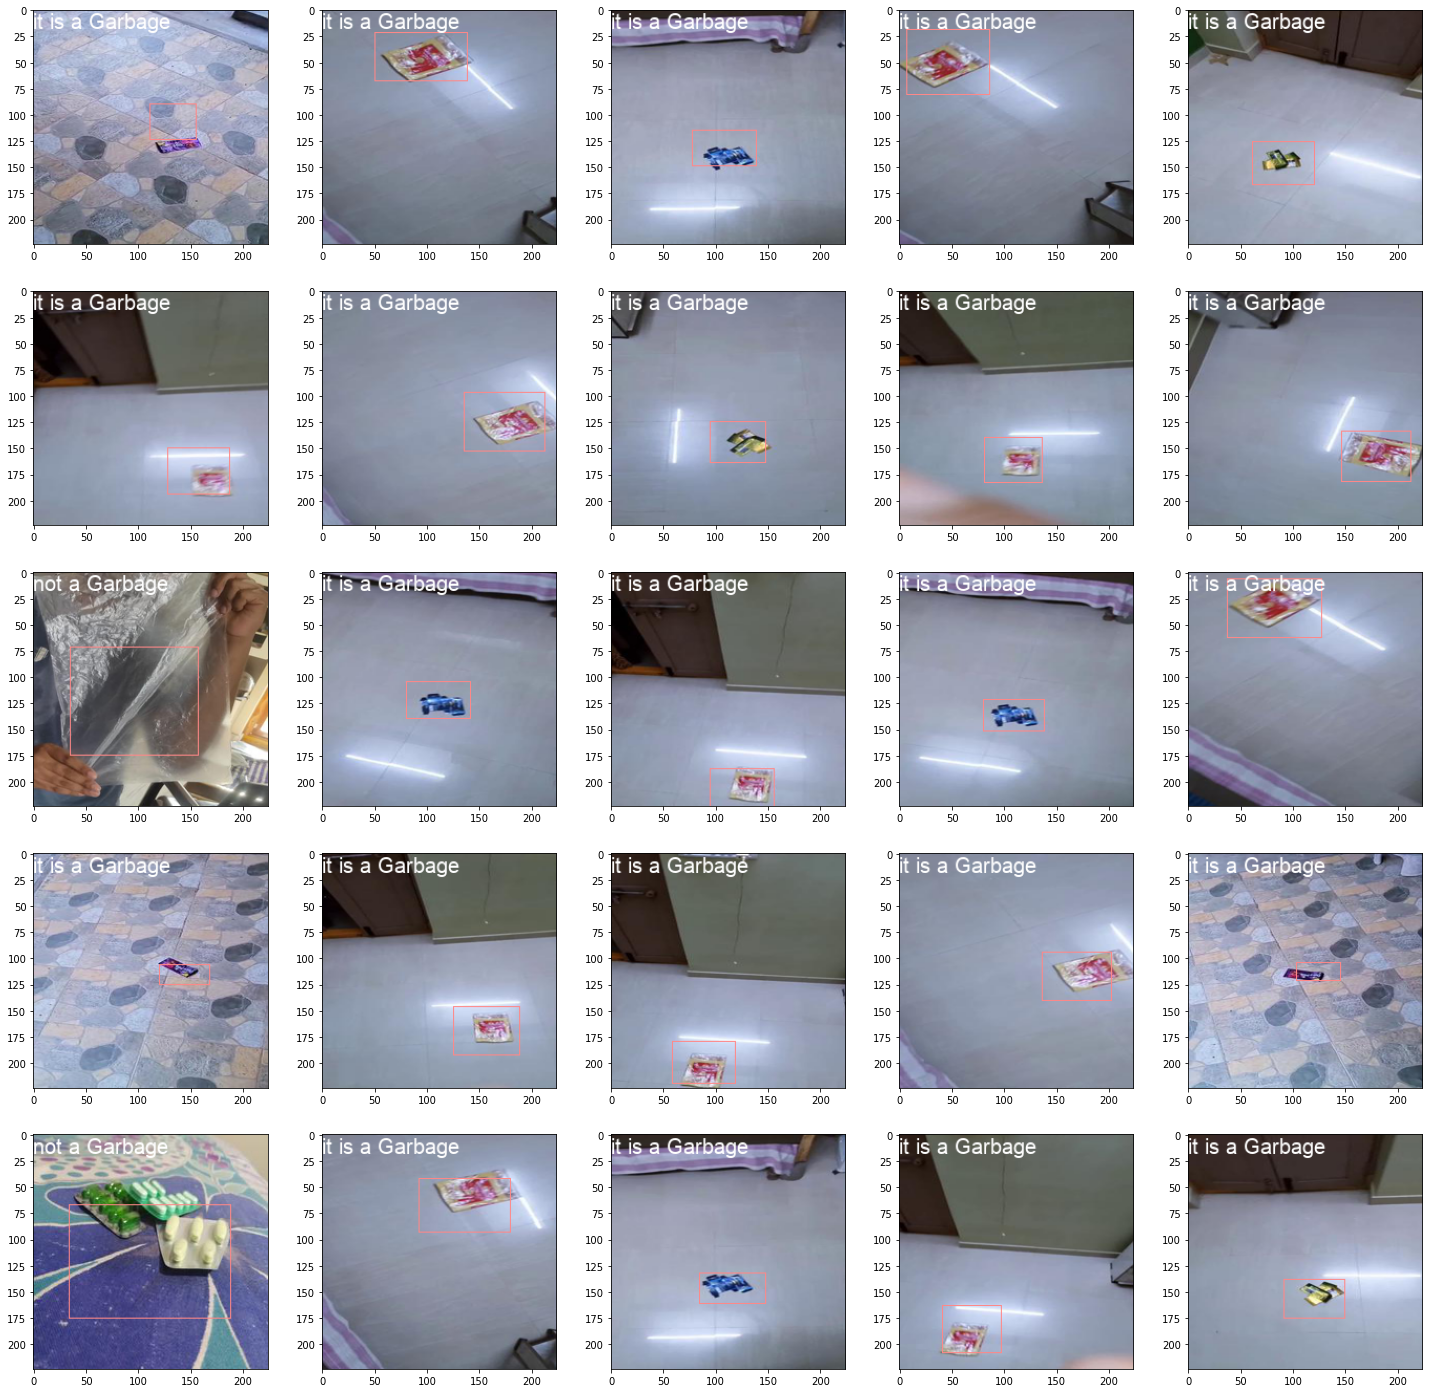

In [ ]:
from PIL import ImageFont
font = ImageFont.truetype('/content/drive/My Drive/arial.ttf', 20)
plt.figure(figsize=(25,25)) # specifying the overall grid size
name,im,id,x_ac,y_ac,w_ac,h_ac = next(iter(train_loader))
im= im.to('cuda') 
predictions,id_pred=Model1(im)
predictions=predictions.double()
id_pred=id_pred.double().squeeze(1)
for i in range(25):
        plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25) 
        image=Image.open(name[i]).resize((224,224))
        draw = ImageDraw.Draw(image)        
        x,y,x1,y1=predictions[i]
        draw.rectangle(((x*224,y*224),(x1*224,y1*224)), outline="#ff8888")
        if(id_pred[i]<0.5):
          text="not a Garbage"
        else:
          text="it is a Garbage"  
        draw.text((0, 0), text, (255, 255, 255), font=font)
        plt.imshow(image)
plt.show()